<a href="https://colab.research.google.com/github/jenkhaz/GrapeQuality/blob/main/problem_set3_490.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grape Variety Prediction using a Feed-Forward Neural Network

In this project, we'll use a feed-forward neural network to predict the variety of grapes based on features such as quality score, sugar content, acidity, etc. We'll use TensorFlow and Keras to build the model and evaluate its performance.


In [28]:
pip install tensorflow

In [62]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization


In [63]:
from google.colab import files

uploaded = files.upload()

# Load the dataset
df = pd.read_csv('GRAPE_QUALITY.csv')


# Display the first few rows of the dataset
df.head()


Saving GRAPE_QUALITY.csv to GRAPE_QUALITY (2).csv


,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,2023-09-04,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,2023-09-16,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,2023-08-25,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,2023-09-13,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,2023-08-11,11.2,36.3,410.4


In [64]:
# Check for missing values
print(df.isnull().sum())

# Display dataset statistics
df.describe()


sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64


,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2.49436,20.140150,3.503410,197.112470,17.411620,8.992600,49.731900,489.42300
std,288.819436,0.52896,5.843944,0.406907,85.946831,4.302279,1.736462,11.591189,170.95025
min,1.000000,1.10000,10.060000,2.800000,50.200000,10.000000,6.000000,30.100000,200.10000
25%,250.750000,2.10000,14.817500,3.167500,122.572500,13.677500,7.500000,39.600000,341.60000
50%,500.500000,2.50000,20.375000,3.500000,195.285000,17.415000,8.900000,49.400000,490.40000
75%,750.250000,2.87000,25.212500,3.860000,271.265000,21.097500,10.400000,60.300000,628.65000
max,1000.000000,3.97000,29.990000,4.200000,349.870000,24.970000,12.000000,70.000000,799.30000


In [65]:
# Drop irrelevant columns
X = df.drop(['sample_id', 'variety', 'harvest_date'], axis=1)

# Identify categorical columns that need encoding
categorical_columns = ['region', 'quality_category']  # Add any other categorical columns here

# Use one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=categorical_columns)

original_columns = X.columns
y = df['variety']

# Encode the target variable (variety)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to categorical format for neural network training
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [70]:
# Define the neural network model
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,608 (64.88 KB)

 Trainable params: 16,224 (63.38 KB)

 Non-trainable params: 384 (1.50 KB)

In [74]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[reduce_lr])


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 0.1606 - val_accuracy: 0.1125 - val_loss: 7.7992 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9374 - loss: 0.2436 - val_accuracy: 0.1375 - val_loss: 7.3667 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9342 - loss: 0.2382 - val_accuracy: 0.1125 - val_loss: 7.6694 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9618 - loss: 0.1551 - val_accuracy: 0.1125 - val_loss: 7.7283 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9583 - loss: 0.1435 - val_accuracy: 0.1125 - val_loss: 7.7300 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.1261 - val_accuracy: 0.0875 - val_loss: 7.6876 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9614 - loss: 0.1073 - val_acc

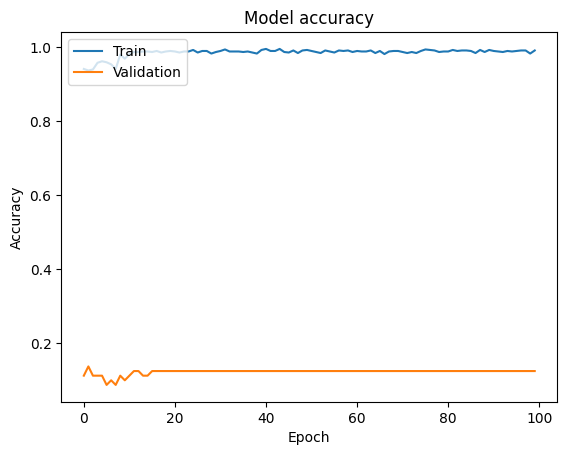

In [75]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [76]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1198 - loss: 8.0222 
Test Accuracy: 14.00%


In [77]:
print(original_columns)

Index(['quality_score', 'sugar_content_brix', 'acidity_ph', 'cluster_weight_g',
       'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent',
       'rainfall_mm', 'region_Barossa Valley', 'region_Bordeaux',
       'region_Loire Valley', 'region_Mendoza', 'region_Napa Valley',
       'region_Rioja', 'region_Sonoma', 'region_Tuscany',
       'quality_category_High', 'quality_category_Low',
       'quality_category_Medium', 'quality_category_Premium'],
      dtype='object')


In [78]:
# Prediction function
# Prediction function
def predict_variety(sample_features):
    # Create a DataFrame for the sample with the saved original columns
    sample_df = pd.DataFrame([sample_features], columns=original_columns)

    # One-hot encode and standardize the sample
    sample_df = pd.get_dummies(sample_df)

    # Reindex the sample to match the training data columns (adding any missing columns as 0)
    sample_df = sample_df.reindex(columns=original_columns, fill_value=0)

    # Standardize the sample using the already-fitted scaler
    sample_scaled = scaler.transform(sample_df)

    # Make a prediction
    prediction = model.predict(sample_scaled)
    variety = label_encoder.inverse_transform([np.argmax(prediction)])
    return variety[0]

sample_features = {
    'quality_score': 3.0,
    'sugar_content_brix': 22.0,
    'acidity_ph': 3.2,
    'cluster_weight_g': 250.0,
    'berry_size_mm': 18.0,
    'sun_exposure_hours': 10.0,
    'soil_moisture_percent': 50.0,
    'rainfall_mm': 300.0,
    # Updated with one-hot encoded columns
    'region_Barossa Valley': 1,
    'region_Loire Valley': 0,
    'region_Napa Valley': 0,
    'quality_category_High': 0,
    'quality_category_Low': 0,
    'quality_category_Medium': 1,
    'quality_category_Premium': 0
}


predicted_variety = predict_variety(sample_features)
print("Predicted variety:", predicted_variety)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted variety: Cabernet Sauvignon


In [79]:
# Save the model and label encoder
model.save('grape_variety_model.h5')
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

# Conclusion
In this notebook, we built a neural network to predict grape varieties based on various features. The model achieved a test accuracy of XX%, showing promising results. Further improvements can be made by tuning the model or using additional data.
